In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from operator import inv
import numpy as np
import matplotlib.pyplot as plt
import random
import numpy.random as rnd
import time
import copy
from numpy.linalg import inv, norm
import numpy.linalg as linalg

import numpy as np
import pandas as pd
from bea.bacterium_modul.BacteriumAbstract import BacteriumAbstract
import plotly.graph_objects as go
import numpy as np
import plotly.express as px
import pandas as pd

from sklearn import preprocessing
from BMA_FUZZY.fuzzy.plot_frbs import plot_frbs
from BMA_FUZZY.fuzzy.w_min import w_min
from BMA_FUZZY.bma.population_module.Population import Population
from BMA_FUZZY.bma.bacterium_module.Bacterium import Bacterium
from BMA_FUZZY.bma.bma_optimizer import BMA_optimizer
from BMA_FUZZY.Input import Input 
from process_pool import process_initializer
from definitions import ROOT_DIR
process_initializer()

Test dataset

data frame:
          x1        x2         y
0  0.000000  0.000000  0.000000
1  0.010101  0.010101  0.011205
2  0.020202  0.020202  0.023015
3  0.030303  0.030303  0.035401
4  0.040404  0.040404  0.048330
observations:
 [[0.         0.        ]
 [0.01010101 0.01010101]
 [0.02020202 0.02020202]
 [0.03030303 0.03030303]
 [0.04040404 0.04040404]]
desired_outputs:
 [0.         0.01120531 0.02301501 0.03540108 0.04832961]


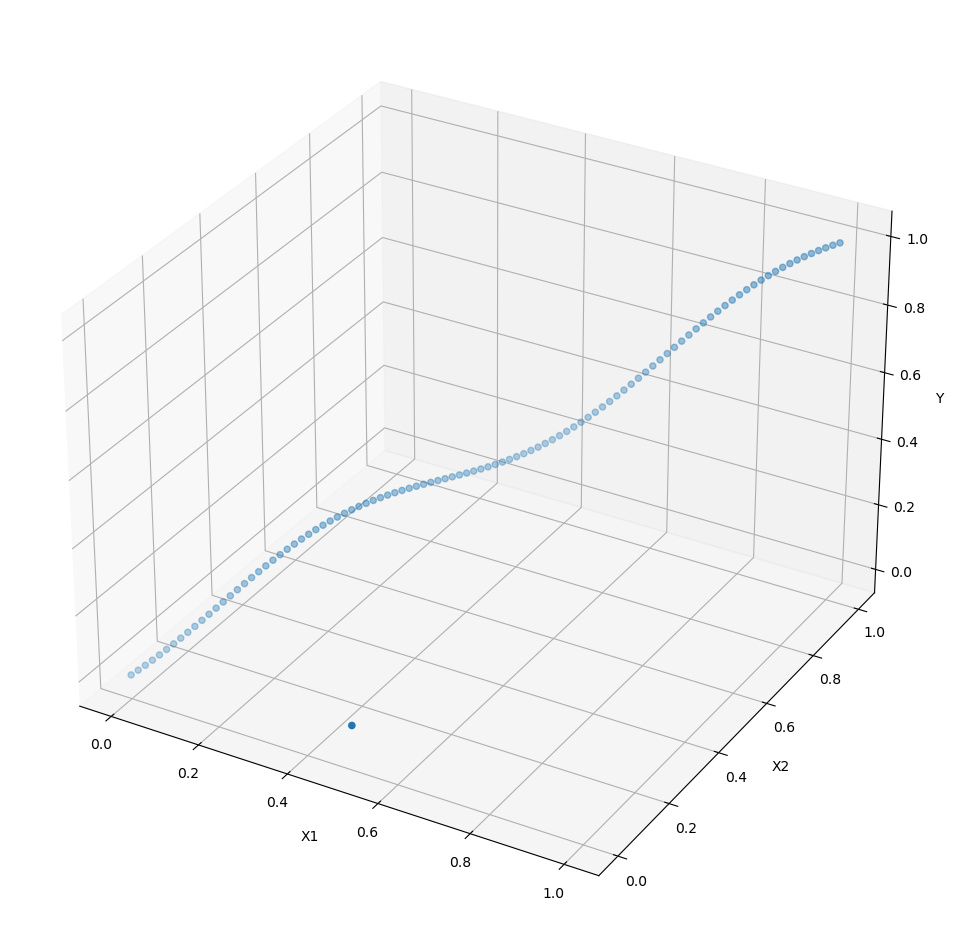

In [2]:
import matplotlib.pyplot as plt
from sklearn import preprocessing

X1s = np.linspace(5, 15, 100)
X2s = np.linspace(2, 9, 100)


def f(x1, x2):
  return np.sin(x1) + 2*x2 # x1+x2 

desired_outputs = f(X1s, X2s)
# desired_outputs = np.insert(desired_outputs, [25,26,27,79,80,82, 85], [4,4.1,4.2,22,22.3, 22.34, 10.2]) 
# X1s = np.insert(X1s, [25,26,27,79,80,82, 90], [10, 10.1, 10.2, 5,5.5, 5.59, 6]) 
# X2s = np.insert(X2s, [25,26,27,79,80,82, 10], [2,2.1,2.2, 6,6.01,6.1, 8]) 
desired_outputs = np.insert(desired_outputs, [25], [4,]) 
X1s = np.insert(X1s, [25], [10]) 
X2s = np.insert(X2s, [25], [2]) 
df_main = pd.DataFrame(data={'x1': X1s, 'x2': X2s, 'y':desired_outputs})

min_max_scaler = preprocessing.MinMaxScaler()

x = df_main.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_main = pd.DataFrame(x_scaled, index=df_main.index, columns=df_main.columns)

print('data frame:\n', df_main[:5])
# plt.plot(df_main['x1'], df_main['y'], '.b')
# plt.plot(df_main['x2'], df_main['y'], '.g')
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_main['x1'], df_main['x2'], df_main['y'])
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
observations = np.array(df_main.iloc[:, 0:2].values.tolist())
desired_outputs = np.array(df_main.iloc[:, -1].values.tolist())
print('observations:\n', observations[:5])
print('desired_outputs:\n', desired_outputs[:5])

In [2]:
x1s = np.linspace(5, 15, 30)
x2s = np.linspace(2, 9, 30)

X1s, X2s = np.meshgrid(x1s,x2s)
X1s = np.ravel(X1s)
X2s = np.ravel(X2s)

def f(x1, x2):
  return 2*np.sin(x1) + x2

desired_outputs = f(X1s, X2s) + rnd.normal(0,.5, 900)

df_main = pd.DataFrame(data={'x1': X1s, 'x2': X2s, 'y':desired_outputs})
df_main.loc[-1] = [2.2, 5.7, f(2.2, 5.7) + 5]

min_max_scaler = preprocessing.MinMaxScaler()

x = df_main.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_main = pd.DataFrame(x_scaled, index=df_main.index, columns=df_main.columns)

df = pd.DataFrame(dict(x1=df_main['x1'], x2=df_main['x2'], y=df_main['y']))
fig = go.Figure()
fig.add_scatter3d(x=df_main['x1'], y=df_main['x2'], z=df_main['y'], name='ground_truth', mode='markers')
fig.update_traces(marker_size = 2)
fig.show()

observations = np.array([df_main['x1'].values, df_main['x2'].values]).T
desired_outputs = np.array(df_main['y'])

print(observations.shape)
print(desired_outputs.shape)

(901, 2)
(901,)


In [3]:
inp = Input()
inp.n_gen = 20
inp.n_ind = 16
inp.n_inf = 10 
inp.SUBSAMPLING_ENABLED = False
inp.MULTIPROCESS_ENABLED = True

for i in range(1, 6):
  inp.nr_rules = i
  bma = BMA_optimizer(inp=inp, MyBacteriumConcreteClass=Bacterium, MyPopulationConcreteClass=Population)
  bma.fit(observations=observations, desired_outputs=desired_outputs)
  bma.save(path=f'{ROOT_DIR}/data/fuzzy_models/', filename=f'test_mesh_nrule{i}', append_time=False)


Error: 4.231816744702661: 100%|██████████| 20/20 [02:15<00:00,  6.78s/it] 


[+] Model successfully saved to: c:\Users\LUH1BP\Desktop\BEST\codes\fuzzy-bma/data/fuzzy_models//test_mesh_nrule1


Error: 3.020854527437519: 100%|██████████| 20/20 [04:33<00:00, 13.67s/it] 


[+] Model successfully saved to: c:\Users\LUH1BP\Desktop\BEST\codes\fuzzy-bma/data/fuzzy_models//test_mesh_nrule2


Error: 2.786205297923815: 100%|██████████| 20/20 [07:16<00:00, 21.83s/it] 


[+] Model successfully saved to: c:\Users\LUH1BP\Desktop\BEST\codes\fuzzy-bma/data/fuzzy_models//test_mesh_nrule3


Error: 1.470723843884012: 100%|██████████| 20/20 [09:31<00:00, 28.57s/it] 


[+] Model successfully saved to: c:\Users\LUH1BP\Desktop\BEST\codes\fuzzy-bma/data/fuzzy_models//test_mesh_nrule4


Error: 1.3195602585933675: 100%|██████████| 20/20 [13:04<00:00, 39.24s/it]

[+] Model successfully saved to: c:\Users\LUH1BP\Desktop\BEST\codes\fuzzy-bma/data/fuzzy_models//test_mesh_nrule5


Plot meshgrid predictions

In [15]:
inp = Input()
bma = BMA_optimizer(inp=inp, MyBacteriumConcreteClass=Bacterium, MyPopulationConcreteClass=Population)
df = pd.DataFrame(dict(x1=observations[:, 0], x2=observations[:, 1], y=desired_outputs))
fig = go.Figure()
fig.add_scatter3d(x=df['x1'], y=df['x2'], z=df['y'], name='ground_truth', mode='markers')
DF = {}

### meshgrid
x1s = np.linspace(0, 1, 40)
x2s = np.linspace(0, 1, 40)
X1s, X2s = np.meshgrid(x1s,x2s)
X1s = np.ravel(X1s)
X2s = np.ravel(X2s)
all_space = np.array([X1s, X2s]).T
###


for i in range(1, 6):
  bma.load(path=f'{ROOT_DIR}/data/fuzzy_models/test_mesh_nrule{i}', set_input=True)
  Ys = bma.solution.predict(observations)
  DF[i] = pd.DataFrame(dict(x1=observations[:, 0], x2=observations[:, 1], y=Ys))
  fig.add_scatter3d(x=DF[i]['x1'], y=DF[i]['x2'], z=DF[i]['y'], name=f'nr_rules: {i}', mode='markers')

  Ys = bma.solution.predict(all_space)
  DF[i] = pd.DataFrame(dict(x1=all_space[:, 0], x2=all_space[:, 1], y=Ys))
  fig.add_scatter3d(x=DF[i]['x1'], y=DF[i]['x2'], z=DF[i]['y'], name=f'nr_rules: {i}, etire_space', mode='markers')



fig.update_traces(marker_size = 2)
# fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),scene=dict(aspectmode='cube')) #data
fig.show()

[+] Model loaded successfully!
[+] Model loaded successfully!
[+] Model loaded successfully!
[+] Model loaded successfully!
[+] Model loaded successfully!


Rule number: 1
[+] Model loaded successfully!
Rule number: 2
[+] Model loaded successfully!


c:\Users\LUH1BP\Desktop\BEST\codes\fuzzy-bma\BMA_FUZZY\fuzzy\plot_frbs.py:86: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.

c:\Users\LUH1BP\Desktop\BEST\codes\fuzzy-bma\BMA_FUZZY\fuzzy\plot_frbs.py:86: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



Rule number: 3
[+] Model loaded successfully!
Rule number: 4
[+] Model loaded successfully!


c:\Users\LUH1BP\Desktop\BEST\codes\fuzzy-bma\BMA_FUZZY\fuzzy\plot_frbs.py:86: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.

c:\Users\LUH1BP\Desktop\BEST\codes\fuzzy-bma\BMA_FUZZY\fuzzy\plot_frbs.py:86: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



Rule number: 5
[+] Model loaded successfully!


c:\Users\LUH1BP\Desktop\BEST\codes\fuzzy-bma\BMA_FUZZY\fuzzy\plot_frbs.py:86: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



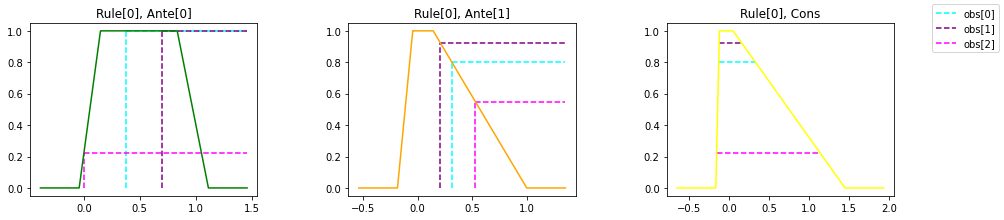

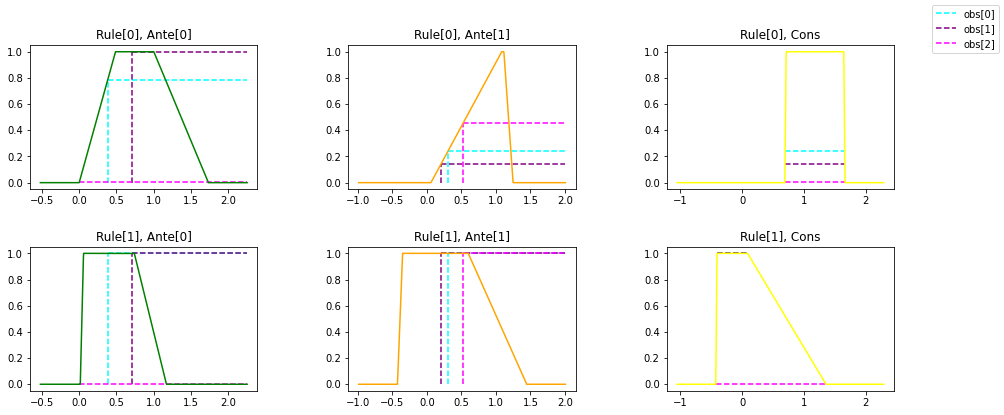

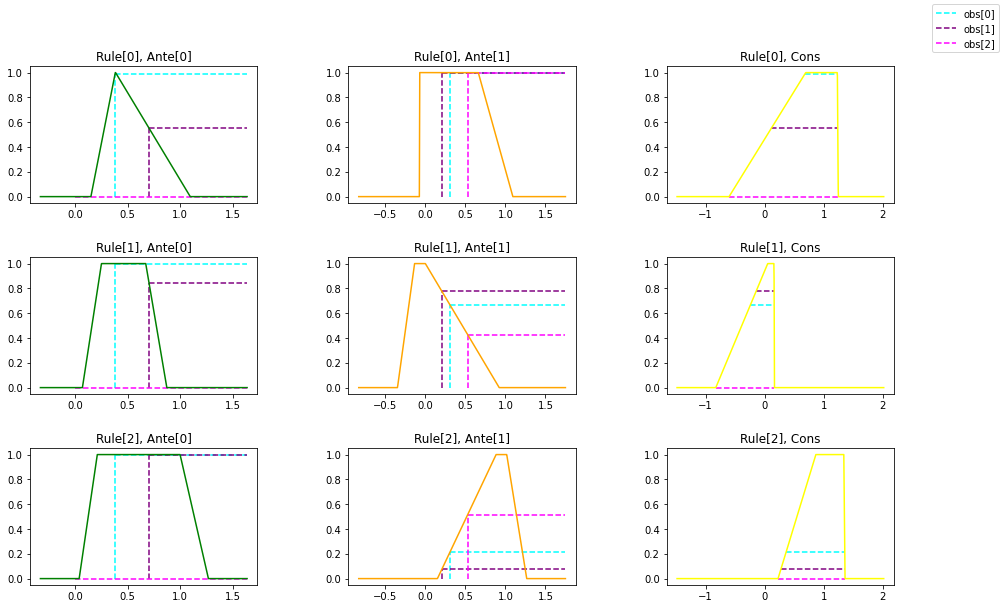

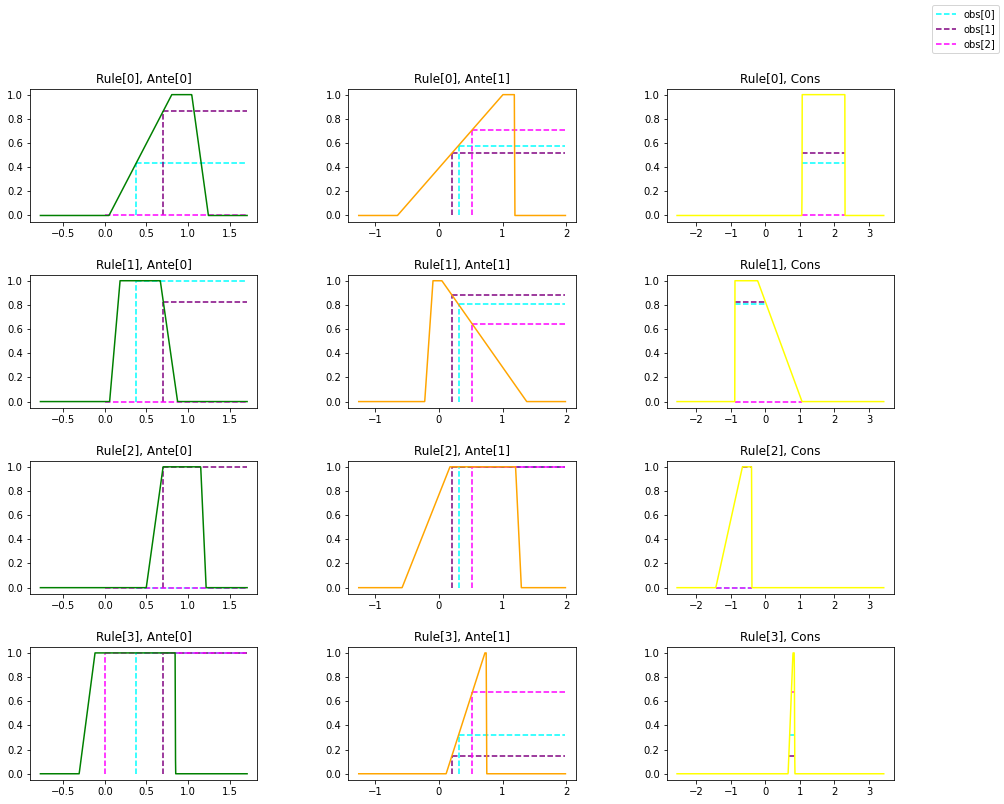

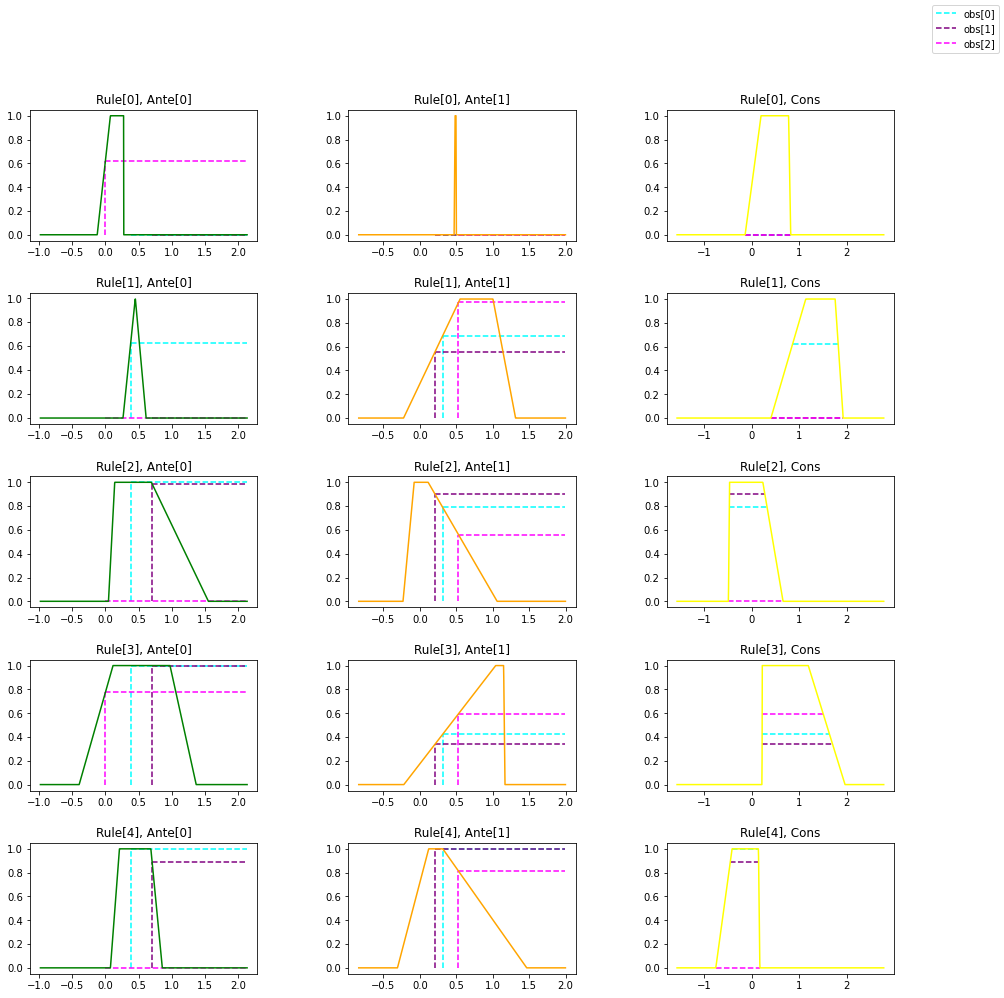

In [10]:
inp = Input()
bma = BMA_optimizer(inp=inp, MyBacteriumConcreteClass=Bacterium, MyPopulationConcreteClass=Population)
DF = {}

# obs = np.array([[0.11111, 0.11111], [0.606060, 0.606060], [0.929292, 0.929292], [0.5, 0]])
obs = np.array([[0.380, 0.310], [0.703, 0.206], [0, 0.5285714]])

for i in range(1, 6):
  print(f'Rule number: {i}')
  bma.load(path=f'{ROOT_DIR}/data/fuzzy_models/test_mesh_nrule{i}', set_input=True)
  bma.solution.plot_fuzzyRBS(obs=obs)

In [11]:
bma.solution.model

array([[[-0.12304272,  0.07522392,  0.27496279,  0.27537583],
        [ 0.46946921,  0.48267977,  0.49581835,  0.4994406 ],
        [-0.13573826,  0.19863857,  0.77822311,  0.82228061]],

       [[ 0.26491291,  0.44941054,  0.44941574,  0.61122757],
        [-0.22449682,  0.55032335,  1.00207347,  1.31226221],
        [ 0.40664868,  1.13870787,  1.75596275,  1.92368202]],

       [[ 0.0461783 ,  0.13999501,  0.69113799,  1.54767735],
        [-0.23201724, -0.07905337,  0.11265932,  1.05953068],
        [-0.48627748, -0.46417323,  0.23679114,  0.66159328]],

       [[-0.39442857,  0.11407227,  0.97118698,  1.36396071],
        [-0.22087431,  1.03998146,  1.14858925,  1.16663598],
        [ 0.21984643,  0.22339803,  1.19144963,  1.96267561]],

       [[ 0.07558458,  0.21121641,  0.68332476,  0.85565332],
        [-0.30800636,  0.12033268,  0.31402588,  1.46460665],
        [-0.75189565, -0.4095317 ,  0.14476002,  0.17385676]]])